In [3]:
# Install PyTorch and import necessary packages
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Data/train.csv")

# Split the data into features and labels
X = df.drop(columns=["price_range"])
y = df["price_range"]

# Split the data into training and test sets
num_samples = X.shape[0]
num_train = int(0.8 * num_samples)
num_test = num_samples - num_train
X_train, X_test = X[:num_train], X[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

# Scale the data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Convert the data to tensors
X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.Tensor(y_train.values).long()
y_test = torch.Tensor(y_test.values).long()



 train Epoch 1/350, Loss: 1.3936, Accuracy: 0.2506
 train Epoch 11/350, Loss: 1.3895, Accuracy: 0.2675
 train Epoch 21/350, Loss: 1.3828, Accuracy: 0.2950
 train Epoch 31/350, Loss: 1.3706, Accuracy: 0.3119
 train Epoch 41/350, Loss: 1.3489, Accuracy: 0.3887
 train Epoch 51/350, Loss: 1.3122, Accuracy: 0.4837
 train Epoch 61/350, Loss: 1.2561, Accuracy: 0.5325
 train Epoch 71/350, Loss: 1.1765, Accuracy: 0.5600
 train Epoch 81/350, Loss: 1.0736, Accuracy: 0.5875
 train Epoch 91/350, Loss: 0.9589, Accuracy: 0.6500
 train Epoch 101/350, Loss: 0.8464, Accuracy: 0.6969
 train Epoch 111/350, Loss: 0.7422, Accuracy: 0.7831
 train Epoch 121/350, Loss: 0.6469, Accuracy: 0.8569
 train Epoch 131/350, Loss: 0.5605, Accuracy: 0.8844
 train Epoch 141/350, Loss: 0.4828, Accuracy: 0.9125
 train Epoch 151/350, Loss: 0.4136, Accuracy: 0.9269
 train Epoch 161/350, Loss: 0.3536, Accuracy: 0.9419
 train Epoch 171/350, Loss: 0.3027, Accuracy: 0.9538
 train Epoch 181/350, Loss: 0.2601, Accuracy: 0.9606
 tra

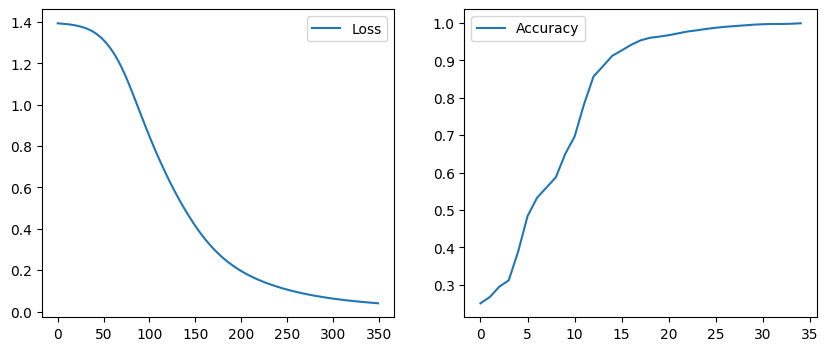

In [15]:
# Define the model
class MobilePriceClassifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
hidden_size1 = 32
hidden_size2 = 16
hidden_size3 = 8
num_classes = 4
model = MobilePriceClassifier(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


# Initialize lists to store the loss and accuracy for each epoch
losses = []
accuracies = []

# Train the model
num_epochs = 350
for epoch in range(num_epochs):
    # Forward pass
    output = model(X_train)
    loss = criterion(output, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Store the loss and accuracy
    losses.append(loss.item())
    if epoch % 10 == 0:
        with torch.no_grad():
            output = model(X_train)
            predicted = torch.argmax(output, dim=1)
            accuracy = (predicted == y_train).float().mean()
            print(f' train Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')
            accuracies.append(accuracy)


    
    # Print the loss and accuracy every 50 epochs

with torch.no_grad():
    output = model(X_test)
    predicted = torch.argmax(output, dim=1)
    accuracy = (predicted == y_test).float().mean()
    print(f' test Accuracy: {accuracy:.4f}')


    
# Plot the loss and accuracy on separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(losses, label='Loss')
ax2.plot(accuracies, label='Accuracy')
ax1.legend()
ax2.legend()
plt.show()